In [45]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import utils


warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [ ]:
df_match_2024 = pd.read_csv('data/atp_matches_2024.csv')


GIOCATORE = "Alexander Zverev"
avversario = "Andrey Rublev"

In [47]:
def aces_number(df, player_name,):
    mask = (df['winner_name'] == player_name) | (df['loser_name'] == player_name)
    return df.loc[mask, 'match_id'].values

11.0 nan 1


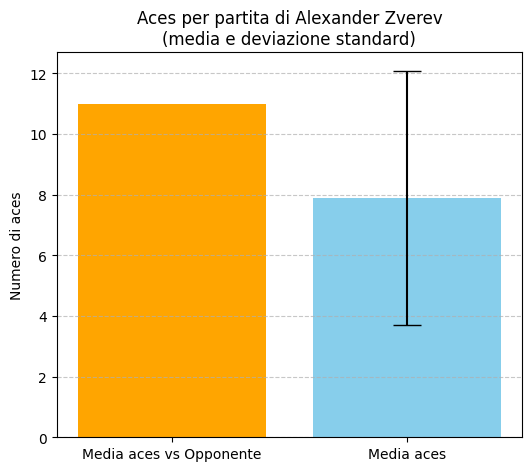

In [48]:
media_aces, dev_std_aces = utils.df_ace_per_anno(GIOCATORE, df_match_2024, )

media_vs_opp, dev_std_vs_opp, n_match_vs_opp = utils.df_ace_per_anno_vs_opponent(GIOCATORE, avversario, df_match_2024, returnNumMatches=True)
print(media_vs_opp, dev_std_vs_opp, n_match_vs_opp)


plt.figure(figsize=(6, 5))
plt.bar(['Media aces vs Opponente'], [media_vs_opp], yerr=[dev_std_vs_opp], capsize=10, color='orange')
plt.bar(['Media aces'], [media_aces], yerr=[dev_std_aces], capsize=10, color='skyblue')
plt.ylabel('Numero di aces')
plt.title(f'Aces per partita di {GIOCATORE}\n(media e deviazione standard)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [49]:

giocatore = GIOCATORE 
df_match = df_match_2024

# Partite tra giocatore e avversario
# df_giocatore = df_match
df_giocatore = df_match[
    ((df_match['winner_name'] == giocatore) & (df_match['loser_name'] == avversario)) |
    ((df_match['winner_name'] == avversario) & (df_match['loser_name'] == giocatore))
]

# Elimina Grandi Slam (best_of = 3)
df_giocatore = df_giocatore[df_giocatore['best_of'] == 3]

# Filtra colonne aces
df_aces = df_giocatore[['tourney_id', 'winner_name', 'loser_name', 'w_ace', 'l_ace']].copy()

# Crea una colonna 'aces_giocatore' con il numero di ace fatti dal giocatore
df_aces['aces_giocatore'] = df_aces.apply(
    lambda row: row['w_ace'] if row['winner_name'] == giocatore else row['l_ace'], axis=1
)

# Calcola MEAN e DEV STD degli ace
media_aces = df_aces['aces_giocatore'].mean()
dev_std_aces = df_aces['aces_giocatore'].std()
num_matches = len(df_aces)

df_giocatore

media_aces, dev_std_aces, num_matches


(11.0, nan, 1)